## Trabalho de finalização da Fase 1 do curso de Inteligencia Artificial para Devs da Fiap.

Grupo é formado por:

1. Bernardo Fusco
2. Bruno Luz
3. Diogo Leal
4. Leonardo Nunes

### Analise exploratória dos dados

O passo a seguir é referente a abertura do arquivo csv que contém os dados de __idade__, __genero__, __imc__, __filhos__, se é __fumante__ ou não, __região__ que vive e os __encargos__ gerados enquanto cliente do convênio.

A base abaixo será utilizada para treinarmos o modelo de previsão regressivo. 

O qual nos gerará uma previsão de encargo de acordo com o perfil enviado.

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
dataset = pd.read_csv('../Base_e_Modelo/baseSeguroSaude.csv')
dataset.describe()

,idade,imc,filhos,encargos
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,43.375872,34.839445,2.001994,2662.631735
std,24.247544,8.722414,0.814046,1188.414005
min,1.000000,20.035877,0.000000,700.000000
25%,23.000000,27.128878,1.000000,1600.000000
50%,43.000000,34.804702,2.000000,2500.000000
75%,65.000000,42.355792,3.000000,3700.000000
max,85.000000,49.995371,3.000000,5100.000000


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

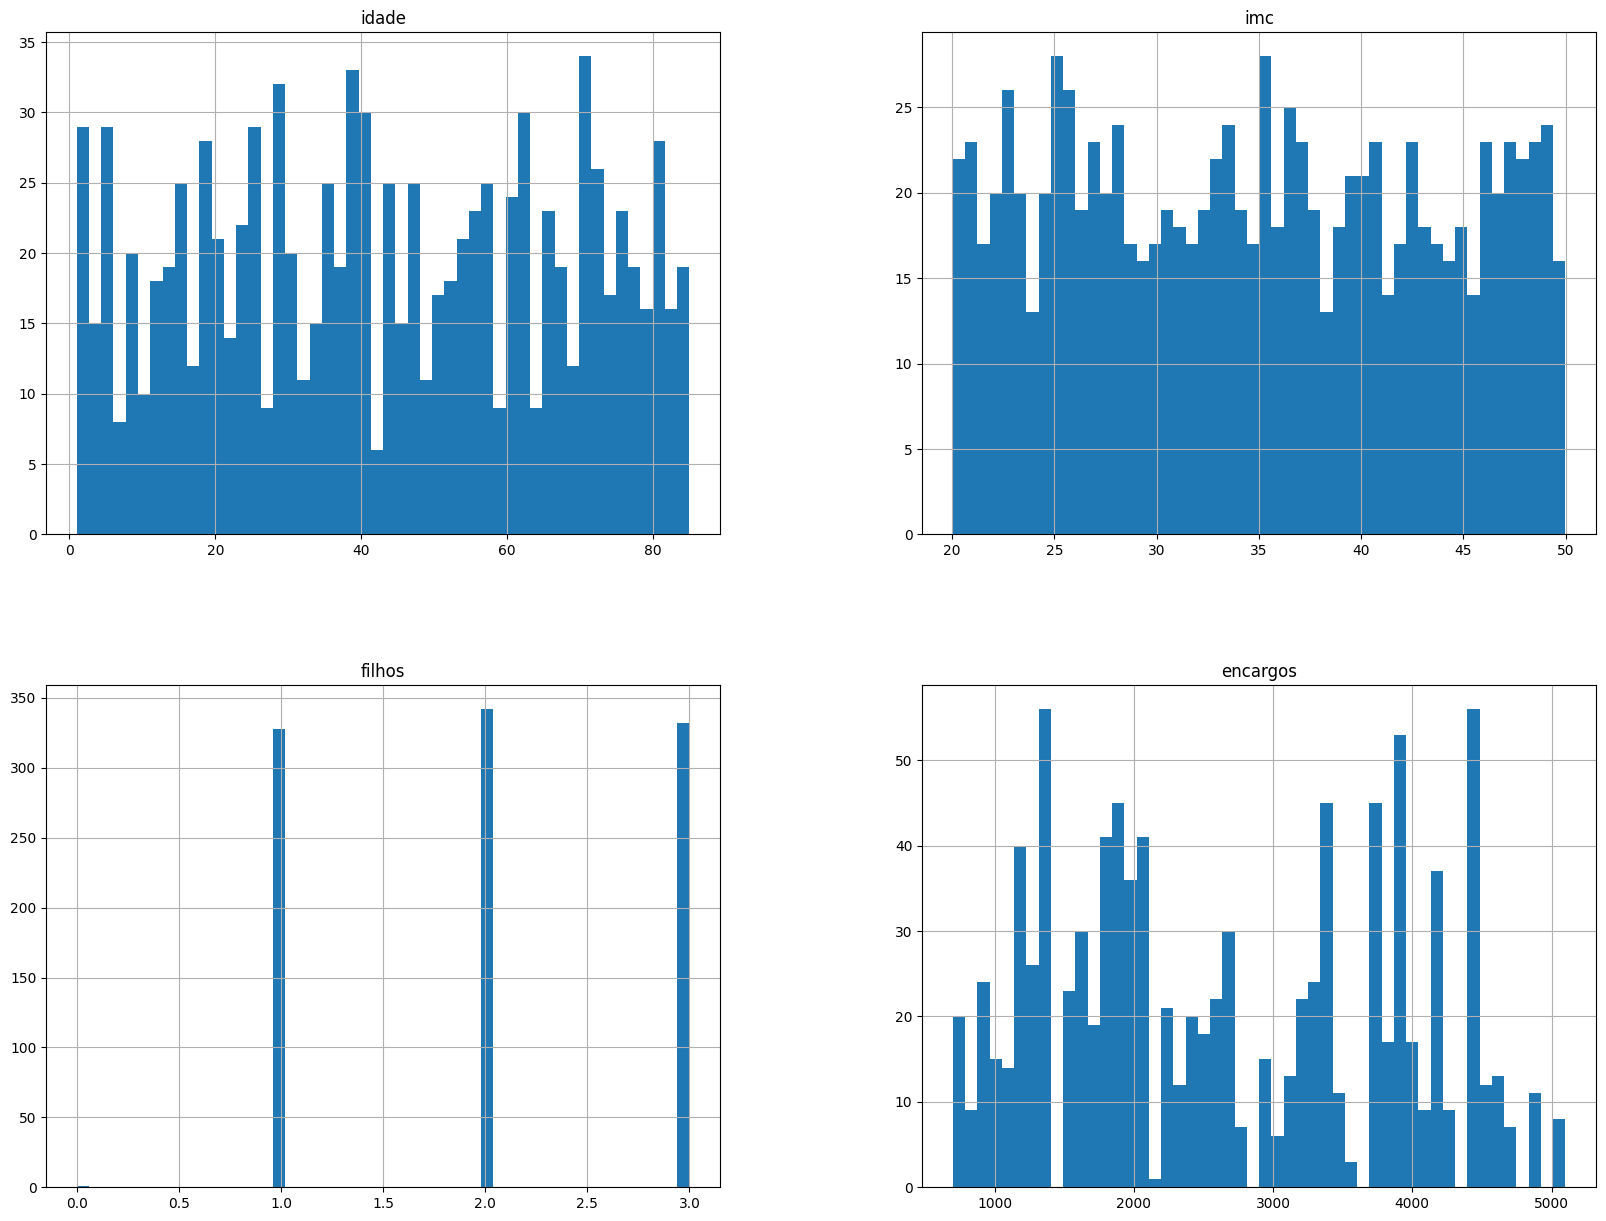

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

Nos gráficos abaixo iremos explorar as informações existentes no data frame acima. Utilizaremos o grafico de scatterplot para vermos a disperção visual entre as informações de idade e encargos, primeiramente. A ideia é começarmos a analisar a relação entre as variáveis, antes de tratarmos sobre a correlação entre elas.

##### Grafico de Dispersão entre a idade e encargos

<Axes: xlabel='idade', ylabel='encargos'>

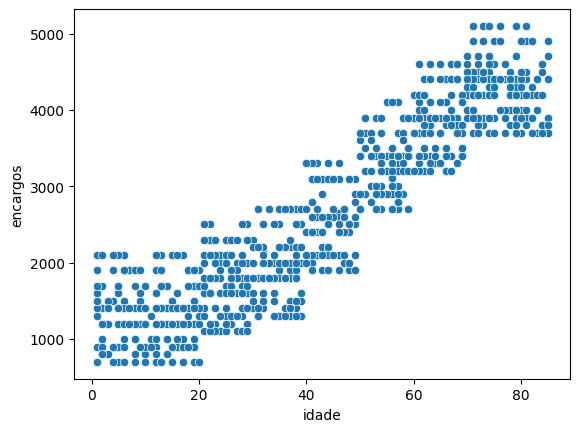

In [127]:
sns.scatterplot(data=dataset, x='idade', y='encargos')

##### Grafico de Dispersão entre a idade e encargos, no entanto, destacaremos também quais clientes são fumantes ou não. 

A ideia é verificar se há relação do habito de fumar ou não, quando comparamos a idade e o encargo.

<Axes: xlabel='idade', ylabel='encargos'>

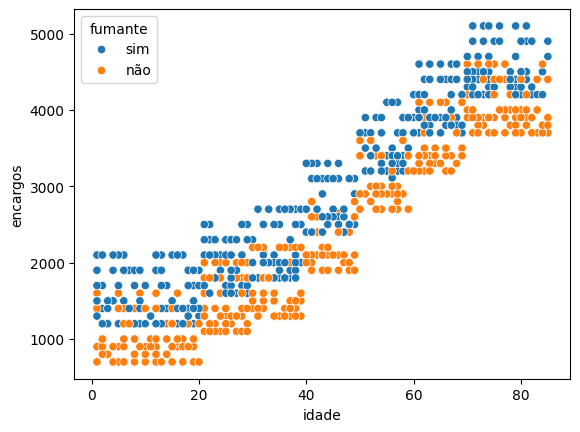

In [128]:
sns.scatterplot(data=dataset, x='idade', y='encargos', hue='fumante')

Com os graficos acima, notamos que há uma relação entre as variaveis de idade, encargo e fumante. Quanto mais velho, mais se gasta, e há um adicional se a pessoa é fumante. Para confirmarmos isso, usaremos o processo de correlação entre as variáveis destacadas. 

Antes de atuarmos na correlação dos dados, é necessário preparar os dados a serem correlacionados. 

A preparação dos dados consiste em normalizá-los e padronizá-los. 

### Preparação dos dados

Iremos atuar em 2 frentes durante a fase preparatória dos dados.

1. Tratar os dados do tipo binário e categórico através de um Pipeline de tratativa de dados.
2. Tratar a escala dos dados.

#### Análise dos dados

Repare que há dados do tipo __categórico__, __binário__, __contínuo__ e __discreto__ no dataframe que estamos atuando. 

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit

df = dataset.copy()

df.genero.head()

0     feminino
1    masculino
2    masculino
3    masculino
4     feminino
Name: genero, dtype: object

In [156]:
df.regiao.head()

0     sudeste
1    nordeste
2     sudeste
3       norte
4         sul
Name: regiao, dtype: object

In [157]:
df.fumante.head()

0    sim
1    não
2    não
3    não
4    sim
Name: fumante, dtype: object

In [159]:
df.encargos.head()

0    3109.889763
1    2650.702647
2    2159.037990
3     900.000000
4    4700.000000
Name: encargos, dtype: float64

In [160]:
df.filhos.head()

0    2
1    1
2    0
3    3
4    3
Name: filhos, dtype: int64

In [161]:
df.idade.head()

0    56
1    46
2    32
3     5
4    70
Name: idade, dtype: int64

#### Análise da escala dos dados

Nesta etapa, observaremos a diferença de escala entre as colunas que fazem parte do data frame atual.

<module 'matplotlib.pyplot' from "c:\\Users\\Diogo'sNote\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py">

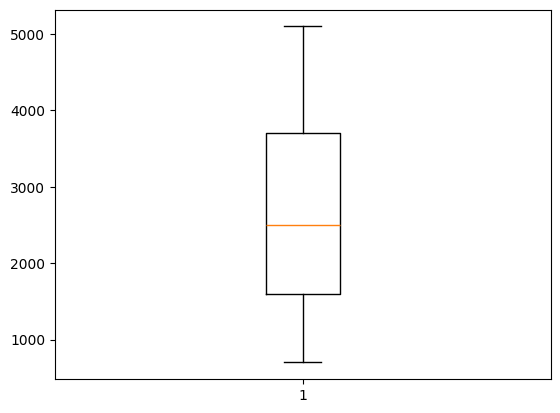

In [162]:
data = df.encargos
plt.boxplot(data)
plt

<module 'matplotlib.pyplot' from "c:\\Users\\Diogo'sNote\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py">

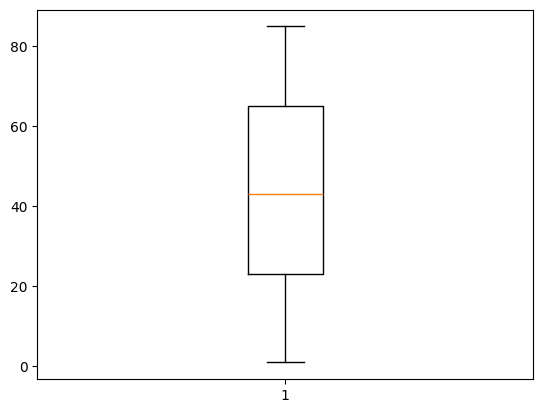

In [163]:
data = df.idade
plt.boxplot(data)
plt

<module 'matplotlib.pyplot' from "c:\\Users\\Diogo'sNote\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py">

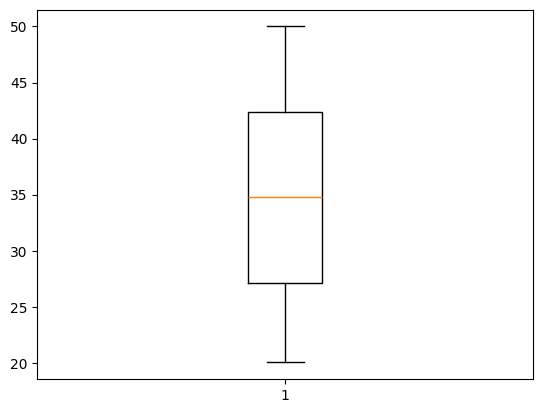

In [164]:
data = df.imc
plt.boxplot(data)
plt

#### Análise de valores nulos

Também analisamos se existem dados nulos em nossa base de dados, e não encontramos valores nulos a serem tratados, conforme codigo abaixo:

In [165]:
# Verificação de valores nulos no dataframe
df.isnull().sum()

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

#### Etapa de pré-processamento dos dados

Após observamos que os dados possuem escalas diferentes e tipos diferentes, iniciaremos o processo de encoder das caracteristicas dos registros, primeiramente. 

* Para a caracteristica de fumante e genero utilizaremos a função __OneHotEncoder()__. Função utilizada em cenários onde a informação é do tipo booleano (sim ou não).

* Para as caracteristicas de regiao utilizaremos a função __OrdinalEncoder()__. Função utilizada em cenários onde possuem mais de um valor para a caracteristica em questão.

In [166]:
try:
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-learn < 0.20  
    from future_encoders import OneHotEncoder # Scikit-learn < 0.20 
    from future_encoders import OrdinalEncoder # Scikit-learn < 0.20   

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df_num = df.drop(columns=['genero', 'fumante', 'regiao'],axis='')

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)
df_num_tr

array([[ 5.20895036e-01, -5.80985692e-01, -2.45073749e-03,
         3.76536420e-01],
       [ 1.08276397e-01, -1.03028025e+00, -1.23149559e+00,
        -1.00428299e-02],
       [-4.69389698e-01, -1.35633366e+00, -2.46054044e+00,
        -4.23964186e-01],
       ...,
       [ 4.38371308e-01, -1.46580744e+00, -1.23149559e+00,
         8.73336884e-01],
       [ 8.50989947e-01,  8.01205453e-01, -2.45073749e-03,
         1.04171236e+00],
       [-1.08831766e+00,  6.54667812e-01,  1.22659411e+00,
        -1.65229528e+00]])

In [168]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_ordinal_attribs = ['regiao']
cat_onehot_attribs = ['fumante', 'genero']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_ordinal_attribs),
    ("cat1hot", OneHotEncoder(sparse_output=False), cat_onehot_attribs),
])

df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[ 5.20895036e-01, -5.80985692e-01, -2.45073749e-03, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.08276397e-01, -1.03028025e+00, -1.23149559e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-4.69389698e-01, -1.35633366e+00, -2.46054044e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 4.38371308e-01, -1.46580744e+00, -1.23149559e+00, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 8.50989947e-01,  8.01205453e-01, -2.45073749e-03, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.08831766e+00,  6.54667812e-01,  1.22659411e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

Após pré-processarmos as informações temos um array de dados. É necessário transformar esse array em um dataframe

In [169]:
column_names = [
    'idade', 'imc', 'filhos','encargos','regiao','fumante_nao', 'fumante_sim', 'feminino', 'masculino'
]

df_new = pd.DataFrame(data=df_prepared, columns=column_names)
df_new.head()

,idade,imc,filhos,encargos,regiao,fumante_nao,fumante_sim,feminino,masculino
0,0.520895,-0.580986,-0.002451,0.376536,3.0,0.0,1.0,1.0,0.0
1,0.108276,-1.030280,-1.231496,-0.010043,1.0,1.0,0.0,0.0,1.0
2,-0.469390,-1.356334,-2.460540,-0.423964,3.0,1.0,0.0,0.0,1.0
3,-1.583460,-0.176884,1.226594,-1.483920,2.0,1.0,0.0,0.0,1.0
4,1.098561,1.316299,1.226594,1.715214,4.0,0.0,1.0,1.0,0.0


### Execução da correlação dos dados e variáveis

<Axes: >

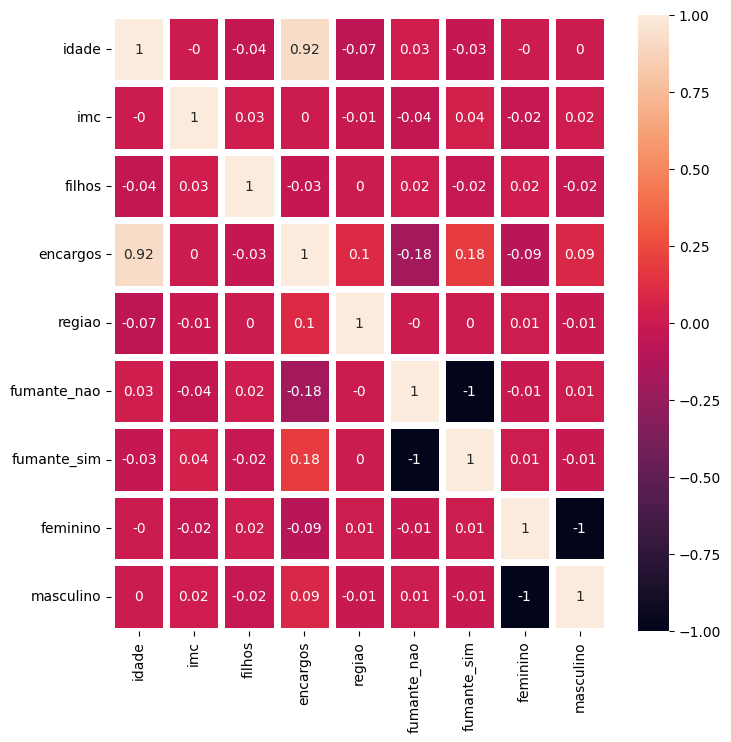

In [170]:
# Matrix de correlação das variáveis após o tratamento dos dados.
correlation_matrix = df_new.corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

Após a analise da correlação, notamos que a variavel de __idade__ e __encargo__ possuem uma __correlação crescente de maneira positiva__. Ou seja, quanto mais velha(o) for a pessoa, consequentemente, maior será o encargo por esse cliente. 

Ainda podemos dizer que o encargo sofre __variação positiva__ e de maneira crescente se adicionarmos a variável se a pessoa é __fumante__ ou não. 

O genero da pessoa ainda pode influenciar nessa relação, conforme mostrado na matrix de correlação. Além de possuir uma chance maior de gasto, se o cliente for da região Sudeste.

### Separação dos dados para testes e treinos

Iremos criar a base de treino e teste a ser utilizada, consideraremos o padrão 80/20. 

Onde iremos utilizar __20%__ dos dados para teste e o restante para treinamento do modelo a ser desenvolvido.

In [173]:
from sklearn.model_selection import train_test_split

x = df_new.drop(columns=["encargos", "imc", "filhos"]) # caracteristicas
y = df_new['encargos'] # caracteristica target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Criação do Modelo Regrassão Linear

Para atender o modelo de previsão de quanto um cliente tende a gastar levando em consideração a idade, genero e a região que o mesmo vive, iremos utilizar o modelo de Regressão Linear e iremos trabalhar com mais de uma entrada, mais de uma caracteristica no perfil do dado. 

A variável alvo é a __encargos__. 

Deseja-se encontrar um valor estimado por usuário levando em consideração as caracteristicas do cliente.

#### Criação do modelo de treinamento

In [184]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg

LinearRegression()

#### Previsão do modelo criado com a base de teste

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

previsao = lin_reg.predict(x_test)

#### Avaliação do Desempenho 

In [186]:
mse = mean_squared_error(y_test, previsao)
erro_medio_quadratico = np.sqrt(mse)
erro_absoluto_medio = mean_absolute_error(y_test, previsao)
r_quadrado = r2_score(y_test, previsao)

print(f"Erro Médio Quadrático: {erro_medio_quadratico}")
print(f"Erro Absoluto Médio: {erro_absoluto_medio}")
print(f"R² (coeficiente de determinação): {r_quadrado}")

Erro Médio Quadrático: 0.26956385039339875
Erro Absoluto Médio: 0.21705191278604208
R² (coeficiente de determinação): 0.923270764169809
